<a href="https://colab.research.google.com/github/jennif8r/NLP/blob/main/Spacy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Baixando Biblioteca...

In [1]:
!pip install -U spacy==3.2.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 659.5/659.5 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 3.8 MB/s eta 0:00:00
  Attempting uninstall: wasabi
    Found existing installation: wasabi 1.1.3
    Uninstalling wasabi-1.1.3:
      Successfully uninstalled wasabi-1.1.3
  Attempting uninstall: typer
    Found existing installation: typer 0.12.3
    Uninstalling typer-0.12.3:
      Successfully uninstalled typer-0.12.3
  Attempting uninstall: smart-open
    Found existing installation: smart-open 7.0.4
    Uninstalling smart-open-7.0.4:
      Successfully uninstalled smart-open-7.0.4
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.8.0
    Uninstalling pydantic-2.8.0:
      Succes

Baixando a biblioteca do modelo pré-treinado em portugues:

In [2]:
!python -m spacy download 'pt_core_news_lg'

2024-07-08 11:28:21.469291: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-08 11:28:21.469357: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-08 11:28:21.472710: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-08 11:28:21.490875: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-08 11:28:23.696722: W tensorflow/compiler/tf2

In [3]:
import spacy

In [4]:
nlp = spacy.load('pt_core_news_lg')

/usr/local/lib/python3.10/dist-packages/torch/__init__.py:747: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at ../torch/csrc/tensor/python_tensor.cpp:431.)
  _C._set_default_tensor_type(t)


In [5]:
print(type(nlp))

<class 'spacy.lang.pt.Portuguese'>


vamos verificar o que tem no objeto:

In [6]:
print(nlp.pipe_names)

['tok2vec', 'morphologizer', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


In [8]:
#Ao invez de subirmos um documento iremo criar e digitar seu dados dentro dele:

documento = nlp("As ações da Magazine Luiza S.A.,Franca, Brasil, acumularam baixa de 70% ao ano. Assim já devolveram todos os ganhos do período da pandemia.")
#documento = nlp("alegações extraordinárias requerem evidências extraordinárias.carl sagan: 'https://carlsangan.com'")

In [9]:
len(documento.vocab)

381

In [10]:
print(type(documento))

<class 'spacy.tokens.doc.Doc'>


#Produção de Tokens

### Tokenization
Processo de separar a sentença em suas partes: palavras, pontos, símbolos.

![Exemplo](/Imagem/Tokenization.png)

In [11]:
#pegar o nosso documento e fazer a tokenização dela.
for token in documento:
  print(token.text)

As
ações
da
Magazine
Luiza
S.A.,Franca
,
Brasil
,
acumularam
baixa
de
70
%
ao
ano
.
Assim
já
devolveram
todos
os
ganhos
do
período
da
pandemia
.


In [12]:
print(len(documento))

28


Identificar quais tokens é alfanumerico,stop word...

In [13]:
print("Token: ", [token.text for token in documento])
print("Stop word: ", [token.is_stop for token in documento])
print("Alfanumerico: ", [token.is_alpha for token in documento])
print("Maísculo: ", [token.is_upper for token in documento])
print("Pontuação: ", [token.is_punct for token in documento])
print("Número: ", [token.like_num for token in documento])
print("Setença Inicial: ", [token.is_sent_start for token in documento])

Token:  ['As', 'ações', 'da', 'Magazine', 'Luiza', 'S.A.,Franca', ',', 'Brasil', ',', 'acumularam', 'baixa', 'de', '70', '%', 'ao', 'ano', '.', 'Assim', 'já', 'devolveram', 'todos', 'os', 'ganhos', 'do', 'período', 'da', 'pandemia', '.']
Stop word:  [True, False, True, False, False, False, False, False, False, False, False, True, False, False, True, False, False, True, True, False, True, True, False, True, False, True, False, False]
Alfanumerico:  [True, True, True, True, True, False, False, True, False, True, True, True, False, False, True, True, False, True, True, True, True, True, True, True, True, True, True, False]
Maísculo:  [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
Pontuação:  [False, False, False, False, False, False, True, False, True, False, False, False, False, True, False, False, True, False, False, False, False, False, F

In [15]:
#mostrar o formato das palavras
print("Tokens: ", [token.text for token in documento])
print("Formato: ", [token.shape_ for token in documento])

Tokens:  ['As', 'ações', 'da', 'Magazine', 'Luiza', 'S.A.,Franca', ',', 'Brasil', ',', 'acumularam', 'baixa', 'de', '70', '%', 'ao', 'ano', '.', 'Assim', 'já', 'devolveram', 'todos', 'os', 'ganhos', 'do', 'período', 'da', 'pandemia', '.']
Formato:  ['Xx', 'xxxx', 'xx', 'Xxxxx', 'Xxxxx', 'X.X.,Xxxxx', ',', 'Xxxxx', ',', 'xxxx', 'xxxx', 'xx', 'dd', '%', 'xx', 'xxx', '.', 'Xxxxx', 'xx', 'xxxx', 'xxxx', 'xx', 'xxxx', 'xx', 'xxxx', 'xx', 'xxxx', '.']


In [17]:
for token in documento:
  if token.like_num:
    print("Número encontrado: ", token.text)
  if token.is_punct:
    print("Pontuação encontrada: ", token.text)

Pontuação encontrada:  ,
Pontuação encontrada:  ,
Número encontrado:  70
Pontuação encontrada:  %
Pontuação encontrada:  .
Pontuação encontrada:  .


#Part-Of-Speech (POS)
Adiciona tags a cada token, como por exemplo, se é verbo, substantivo, etc.

![Exemplo](/Imagem/PartsOfSpeechTaggong.png)

O spaCy também gera as dependências dos tokens, que são as dependências sintáticas que existem entre os diferentes tokens.

In [23]:
# Os atributos com subscrito (_) mostram a representação textual do valor; sem o subscrito, eles podem retornar códigos numéricos que representam esses valores. Na verdade, eles trazem a referência para o objeto.
for token in documento:
  print(token.text, " - ", token.pos_, " - ", token.dep_ , " - ", token.lemma_ , " - ", token.shape_)

As  -  DET  -  det  -  As  -  Xx
ações  -  NOUN  -  nsubj  -  ações  -  xxxx
da  -  ADP  -  case  -  da  -  xx
Magazine  -  PROPN  -  nmod  -  Magazine  -  Xxxxx
Luiza  -  PROPN  -  appos  -  Luiza  -  Xxxxx
S.A.,Franca  -  PROPN  -  flat:name  -  S.A.,Franca  -  X.X.,Xxxxx
,  -  PUNCT  -  punct  -  ,  -  ,
Brasil  -  PROPN  -  conj  -  Brasil  -  Xxxxx
,  -  PUNCT  -  punct  -  ,  -  ,
acumularam  -  VERB  -  ROOT  -  acumular  -  xxxx
baixa  -  NOUN  -  obj  -  baixo  -  xxxx
de  -  ADP  -  case  -  de  -  xx
70  -  NUM  -  nummod  -  70  -  dd
%  -  SYM  -  nmod  -  %  -  %
ao  -  ADP  -  case  -  ao  -  xx
ano  -  NOUN  -  obl  -  ano  -  xxx
.  -  PUNCT  -  punct  -  .  -  .
Assim  -  ADV  -  advmod  -  Assim  -  Xxxxx
já  -  ADV  -  advmod  -  já  -  xx
devolveram  -  VERB  -  ROOT  -  devolver  -  xxxx
todos  -  DET  -  det  -  todo  -  xxxx
os  -  DET  -  det  -  o  -  xx
ganhos  -  NOUN  -  obj  -  ganho  -  xxxx
do  -  ADP  -  case  -  do  -  xx
período  -  NOUN  -  nmod  -  

In [26]:
#Traz uma descrição morfológica das palavras:
for token in documento:
  print(token.text, " - ", token.morph)

As  -  Definite=Def|Gender=Fem|Number=Plur|PronType=Art
ações  -  Gender=Fem|Number=Plur
da  -  Definite=Def|Gender=Fem|Number=Sing|PronType=Art
Magazine  -  Gender=Fem|Number=Sing
Luiza  -  Gender=Fem|Number=Sing
S.A.,Franca  -  Number=Sing
,  -  
Brasil  -  Gender=Masc|Number=Sing
,  -  
acumularam  -  Mood=Ind|Number=Plur|Person=3|Tense=Past|VerbForm=Fin
baixa  -  Gender=Fem|Number=Sing
de  -  
70  -  NumType=Card
%  -  
ao  -  Definite=Def|Gender=Masc|Number=Sing|PronType=Art
ano  -  Gender=Masc|Number=Sing
.  -  
Assim  -  
já  -  
devolveram  -  Mood=Ind|Number=Plur|Person=3|Tense=Past|VerbForm=Fin
todos  -  Gender=Masc|Number=Plur|PronType=Tot
os  -  Definite=Def|Gender=Masc|Number=Plur|PronType=Art
ganhos  -  Gender=Masc|Number=Plur
do  -  Definite=Def|Gender=Masc|Number=Sing|PronType=Art
período  -  Gender=Masc|Number=Sing
da  -  Definite=Def|Gender=Fem|Number=Sing|PronType=Art
pandemia  -  Gender=Fem|Number=Sing
.  -  


In [27]:
#Mais refinada:
for token in documento:
  print(token.text, " - ", token.tag_)

As  -  DET
ações  -  NOUN
da  -  ADP
Magazine  -  PROPN
Luiza  -  PROPN
S.A.,Franca  -  PROPN
,  -  PUNCT
Brasil  -  PROPN
,  -  PUNCT
acumularam  -  VERB
baixa  -  NOUN
de  -  ADP
70  -  NUM
%  -  SYM
ao  -  ADP
ano  -  NOUN
.  -  PUNCT
Assim  -  ADV
já  -  ADV
devolveram  -  VERB
todos  -  DET
os  -  DET
ganhos  -  NOUN
do  -  ADP
período  -  NOUN
da  -  ADP
pandemia  -  NOUN
.  -  PUNCT


####Listando Entidade Nomeadas

lista de entidades nomeadas do spacy:

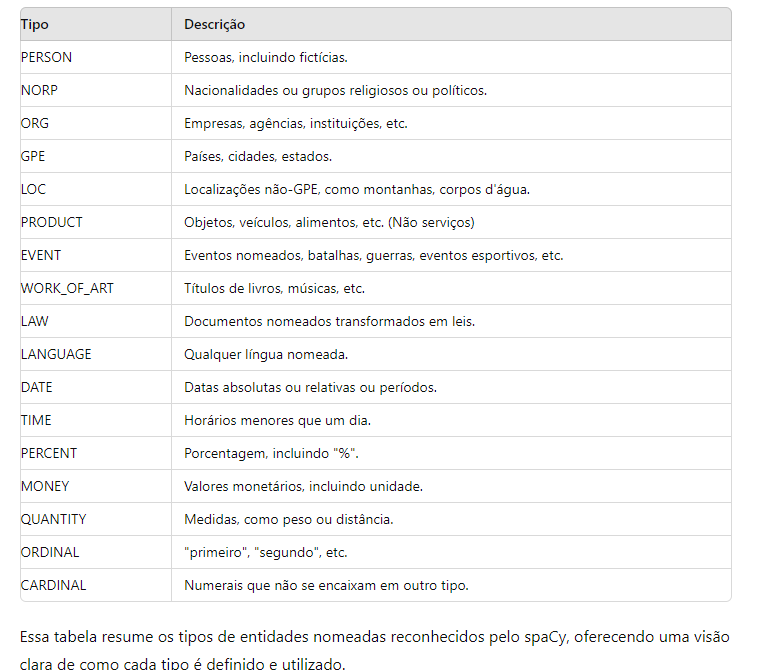